In [1]:
import base64
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from IPython.display import Image, display
from langchain_google_genai import ChatGoogleGenerativeAI
import getpass
import os

In [2]:
os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

---

## Video Inputs

In [3]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

# Ensure you have a video file named 'example_video.mp4' or provide the correct path.
video_file_path = "example_video.mp4"
video_mime_type = "video/mp4"

def convert_video_to_base64(video_file_path: str) -> str:
    """Convert a video file to a base64 encoded string."""
    with open(video_file_path, "rb") as video_file:
        return base64.b64encode(video_file.read()).decode("utf-8")


encoded_video = convert_video_to_base64(video_file_path)

message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe the first few frames of the video."},
        {
            "type": "media",
            "data": encoded_video,  # Use base64 string directly
            "mime_type": video_mime_type,
        },
    ]
)
response = llm.invoke([message])  # Uncomment to run
print(f"Response for video: {response.content}")

Response for video: The video opens in a futuristic, high-tech setting. Three individuals – a man in the center and two women on either side – are gathered around a transparent, glowing table that functions as an interactive display.

*   The man, wearing a light grey long-sleeved shirt, is leaning forward and pointing with his right hand at the holographic interface on the table.
*   The woman to his left, with dark hair, is also gesturing towards the display with her right hand, looking engaged.
*   The woman to his right, with grey hair and a blue jacket, is observing the display and the man intently.

The table itself is illuminated with intricate blue and teal holographic graphics, including circular diagrams, text blocks resembling code or data, and various data visualizations. The background is a curved wall composed of large screens displaying more data, code, and dynamic graphs in similar blue, teal, and pink hues, with glowing horizontal lines connecting them. The overall imp

## Image Generation Outputs

In [4]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-image-preview",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

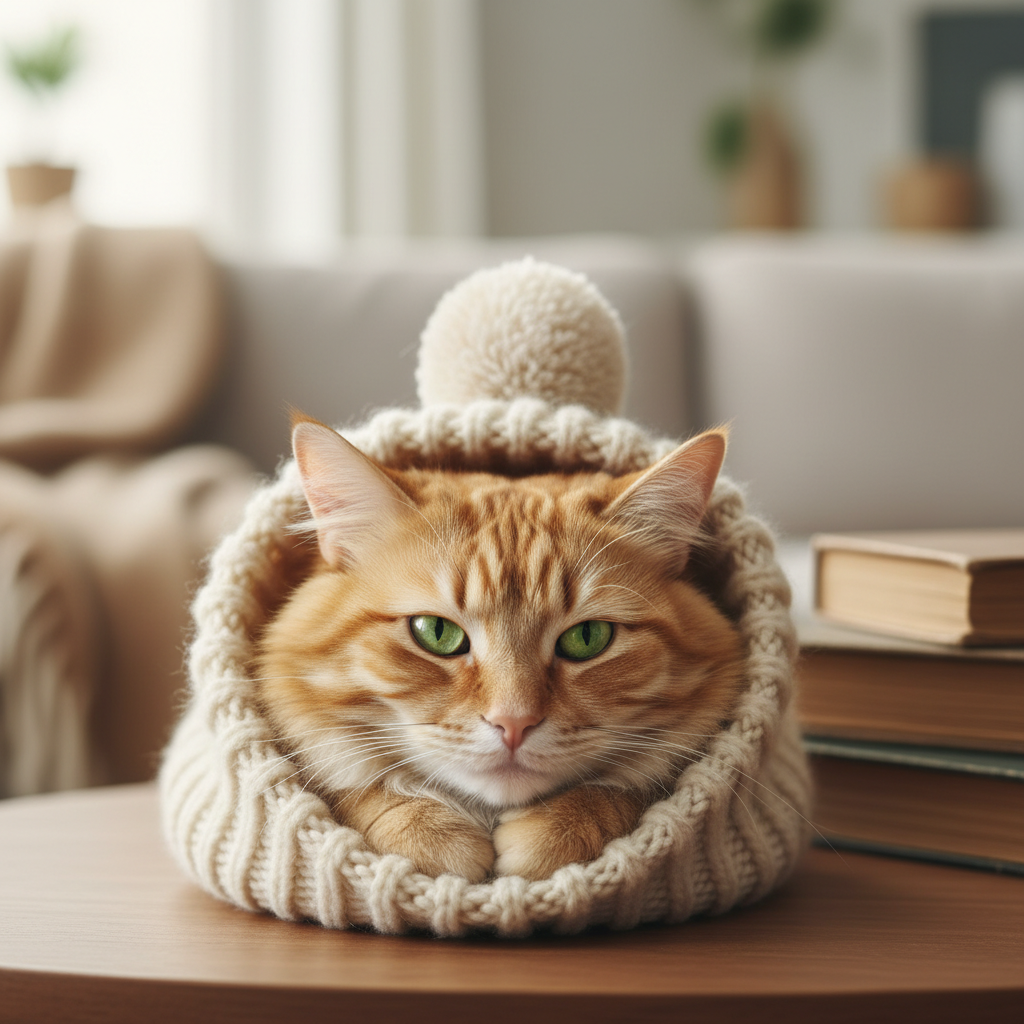

In [5]:
message = {
    "role": "user",
    "content": "Generate a photorealistic image of a cuddly cat wearing a hat.",
}

response = llm.invoke(
    [message],
    # generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

def _get_image_base64(response: AIMessage) -> None:
    image_block = next(
        block
        for block in response.content
        if isinstance(block, dict) and block.get("image_url")
    )
    return image_block["image_url"].get("url").split(",")[-1]


image_base64 = _get_image_base64(response)
display(Image(data=base64.b64decode(image_base64), width=300))

---

## Combining both in the same chat message history

In [ ]:
messages = []

# Video LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

# Image LLM
image_llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-image-preview",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

# Add a video message to the main thread:
system_message = SystemMessage(content='''You are a helpful assistant that will
                               explain both a video and image output''')

message = HumanMessage(
    content=[
        {
            "type": "media",
            "data": encoded_video,  # Use base64 string directly
            "mime_type": video_mime_type,
        },
    ]
)

messages.append(system_message)
messages.append(message)

# Get the image LLM to generate an image of a cat:
next_message = {
    "role": "user",
    "content": "Can you take the same image and make the cat black?",
}

# Call the image LLM:
image_response = image_llm.invoke([next_message],
                                    generation_config=dict(response_modalities=["IMAGE"]))

# Get the image in base64:
image_base64 = _get_image_base64(image_response)

image_message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe the local image."},
        {"type": "image_url", "image_url": f"data:image/png;base64,{image_base64}"},
    ]
)

# Add to the main thread:
messages.append(image_message)

# Run the main thread:
response = llm.invoke(messages)

In [31]:
response.content

"Here's a description of both the video and the image:\n\n**Video Description:**\nThe video displays a vibrant, animated forest scene. In the foreground, there's a small, grassy hillock with a large, old tree growing on top. The tree has a thick, gnarled trunk and exposed roots that spread over the mossy ground. At the base of the tree, nestled into the hill, is a dark, round opening, resembling a burrow or a small cave entrance. Several grey rocks are scattered around the base of the hill. The grass on the hill and in the foreground is a lush, bright green, illuminated by dappled sunlight that creates bright patches and soft shadows. In the background, more trees with dense green foliage are visible, suggesting a deep forest. The overall impression is one of a peaceful, magical, and well-lit natural environment. The video is static, with no discernible movement.\n\n**Image Description:**\nThe image features a striking black cat sitting upright, looking directly at the camera. The cat 